# New Data Exploration


In this notebook, we'll analyze the new preprocessed ADNIMERGE dataset. Our primary goal here is to identify the most suitable algorithms to use to create adequate *classification models*.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns

from CogniPredictAD.visualization import Visualizer

pd.set_option("display.max_rows", 116)
pd.set_option("display.max_columns", 40)
pd.set_option("display.max_info_columns", 40) 

## Loading the Dataset
Open the training dataset with Pandas.

In [2]:
# Open the dataset with pandas
dataset = pd.read_csv("../data/train.csv")
viz = Visualizer(dataset)
dataset.shape
display(dataset)

,DX,AGE,PTGENDER,PTEDUCAT,APOE4,MMSE,CDRSB,ADAS13,LDELTOTAL,FAQ,MOCA,TRABSCOR,RAVLT_immediate,RAVLT_learning,RAVLT_perc_forgetting,mPACCdigit,EcogPtMem,EcogPtLang,EcogPtVisspat,EcogPtPlan,EcogPtOrgan,EcogPtDivatt,EcogSPMem,EcogSPLang,EcogSPVisspat,EcogSPPlan,EcogSPOrgan,EcogSPDivatt,FDG,PTAU/ABETA,Hippocampus/ICV,Entorhinal/ICV,Fusiform/ICV,MidTemp/ICV,Ventricles/ICV,WholeBrain/ICV
0,2,77,0,16,1,28,2.5,5,1,0,24,108,47,5,63.63640,-4.84005,2.250,2.111110,1.000000,1.00,1.333330,1.00,2.375000,2.111110,2.428570,2.60,2.833330,2.75000,1.222830,0.040838,0.004524,0.001882,0.012107,0.011311,0.016977,0.706210
1,0,59,1,16,1,30,0.0,0,19,0,30,47,71,2,0.00000,5.42702,1.000,1.000000,1.000000,1.00,1.000000,1.00,1.000000,1.000000,1.000000,1.00,1.000000,1.00000,1.161970,0.020445,0.004452,0.002756,0.012935,0.014299,0.025614,0.752850
2,3,77,1,12,2,22,8.0,30,0,25,17,300,19,1,100.00000,-18.90540,2.300,1.844446,1.248572,1.58,1.366668,1.75,3.841666,2.847620,3.033334,2.97,3.166668,3.80000,0.924559,0.047131,0.002825,0.001348,0.010049,0.009701,0.053417,0.522572
3,2,82,1,20,0,26,1.5,21,4,0,24,63,35,1,85.71430,-7.95749,1.925,1.269446,1.166668,1.20,1.466668,1.60,1.891666,1.272222,1.066668,1.16,1.733332,2.10000,1.119130,0.020198,0.003736,0.002083,0.013038,0.013942,0.024176,0.637729
4,0,83,0,17,0,27,0.0,5,13,3,25,98,57,7,7.14286,-1.94841,1.250,1.333330,1.000000,1.00,1.333330,1.00,1.375000,1.111110,1.666670,1.00,1.833330,1.25000,1.279034,0.026879,0.004611,0.002170,0.011387,0.012975,0.052196,0.635279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1929,0,72,0,18,1,30,0.0,4,11,0,26,52,42,7,18.18180,2.22837,1.500,2.333330,1.285710,1.00,2.500000,1.25,1.250000,1.000000,1.200000,1.00,1.333330,1.50000,1.416100,0.013555,0.005079,0.003304,0.014043,0.013729,0.027992,0.710296
1930,3,72,0,12,1,26,7.0,29,5,18,19,67,34,-1,100.00000,-9.28099,1.500,1.000000,1.142860,1.00,1.000000,1.00,3.250000,2.333330,2.428570,3.20,3.000000,3.50000,1.268520,0.080942,0.004383,0.001691,0.011582,0.011346,0.022499,0.711762
1931,0,70,0,17,0,29,0.0,23,10,0,20,300,31,4,42.85710,-2.30539,1.125,1.111110,1.000000,1.00,1.000000,1.00,1.000000,1.000000,1.000000,1.00,1.000000,1.00000,1.456170,0.007661,0.005042,0.002406,0.013522,0.013008,0.013065,0.711396
1932,0,84,1,12,0,30,0.5,16,13,0,26,65,27,1,80.00000,-1.42719,2.000,2.000000,2.000000,2.00,1.500000,2.00,1.625000,1.222220,1.285710,1.25,1.000000,1.66667,1.318880,0.021033,0.004567,0.002176,0.012360,0.013614,0.026801,0.663416


## Introductory Data Exploration

In this section we will show some statistics regarding the data.

| Attribute             | Description                                                                        | Category              | Type        |
|:----------------------|:-----------------------------------------------------------------------------------|:----------------------|:------------|
| DX                    | Clinical diagnosis at the time of visit: CN, SMC, EMCI, LMCI, AD                   | Diagnosis             | Integer     |
| AGE                   | Participant’s age at time of visit                                                 | Demographics          | Float       |
| PTGENDER              | Participant's gender (Male/Female)                                                 | Demographics          | Integer     |
| PTEDUCAT              | Years of formal education completed                                                | Demographics          | Integer     |
| APOE4                 | Number of APOE ε4 alleles (0, 1, or 2), a genetic risk factor for Alzheimer’s      | Demographics          | Integer     |
| MMSE                  | Mini-Mental State Examination score (0–30, higher = better)                        | Clinical Scores       | Integer     |
| CDRSB                 | Clinical Dementia Rating - Sum of Boxes (0–18, higher = worse)                     | Clinical Scores       | Float       |
| ADAS13                | ADAS-Cog 13-item total score (higher = worse)                                      | Clinical Scores       | Integer     |
| LDELTOTAL             | Logical Memory II delayed recall total score                                       | Clinical Scores       | Integer     |
| FAQ                   | Functional Activities Questionnaire – functional impairment score                  | Clinical Scores       | Integer     |
| MOCA                  | Montreal Cognitive Assessment – global cognitive function (0–30)                   | Clinical Scores       | Integer     |
| TRABSCOR              | Trail Making Test Part B – time in seconds (higher = worse)                        | Clinical Scores       | Float       |
| RAVLT_immediate       | RAVLT total immediate recall score (sum over 5 trials)                             | Clinical Scores       | Integer     |
| RAVLT_learning        | Learning score (Trial 5 minus Trial 1 of RAVLT)                                    | Clinical Scores       | Integer     |
| RAVLT_perc_forgetting | Percent forgetting from RAVLT (higher = worse)                                     | Clinical Scores       | Float       |
| mPACCdigit            | Modified Preclinical Alzheimer’s Cognitive Composite – Digit Symbol test           | Composite Scores      | Float       |
| EcogPtMem             | Subject self-reported memory complaints (ECog)                                     | ECogPT                | Float       |
| EcogPtLang            | Subject self-reported language difficulties (ECog)                                 | ECogPT                | Float       |
| EcogPtVisspat         | Subject self-reported visuospatial difficulties (ECog)                             | ECogPT                | Float       |
| EcogPtPlan            | Subject self-reported planning difficulties (ECog)                                 | ECogPT                | Float       |
| EcogPtOrgan           | Subject self-reported organizational issues (ECog)                                 | ECogPT                | Float       |
| EcogPtDivatt          | Subject self-reported divided attention issues (ECog)                              | ECogPT                | Float       |
| EcogSPMem             | Informant-reported memory complaints (ECog)                                        | ECogSP                | Float       |
| EcogSPLang            | Informant-reported language issues (ECog)                                          | ECogSP                | Float       |
| EcogSPVisspat         | Informant-reported visuospatial issues (ECog)                                      | ECogSP                | Float       |
| EcogSPPlan            | Informant-reported planning problems (ECog)                                        | ECogSP                | Float       |
| EcogSPOrgan           | Informant-reported organization issues (ECog)                                      | ECogSP                | Float       |
| EcogSPDivatt          | Informant-reported divided attention issues (ECog)                                 | ECogSP                | Float       |
| FDG                   | FDG PET SUVR – brain glucose metabolism                                            | Biomarkers            | Float       |
| PTAU/ABETA            | CSF phosphorylated tau protein/Aβ42 ratio                                          | Biomarkers            | Float       |
| Hippocampus/ICV       | Volume of hippocampus/Intracranial volume ratio from MRI                           | MRI                   | Float       |
| Entorhinal/ICV        | Volume of the entorhinal cortex/Intracranial volume ratio from MRI                 | MRI                   | Float       |
| Fusiform/ICV          | Fusiform gyrus volume/Intracranial volume ratio from MRI                           | MRI                   | Float       |
| MidTemp/ICV           | Middle temporal gyrus volume/Intracranial volume ratio from MRI                    | MRI                   | Float       |
| Ventricles/ICV        | Volume of ventricles/Intracranial volume ratio from MRI                            | MRI                   | Float       |
| WholeBrain/ICV        | Whole brain volume/Intracranial volume ratio from MRI                              | MRI                   | Float       |


In [3]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
DX,1934.0,1.256980,1.130236,0.000000,0.000000,1.000000,2.000000,3.000000
AGE,1934.0,72.622027,7.328544,50.000000,68.000000,73.000000,78.000000,90.000000
PTGENDER,1934.0,0.530507,0.499198,0.000000,0.000000,1.000000,1.000000,1.000000
PTEDUCAT,1934.0,16.044984,2.751201,4.000000,14.000000,16.000000,18.000000,20.000000
APOE4,1934.0,0.549121,0.654814,0.000000,0.000000,0.000000,1.000000,2.000000
MMSE,1934.0,27.367115,2.664296,16.000000,26.000000,28.000000,29.000000,30.000000
CDRSB,1934.0,1.466391,1.777207,0.000000,0.000000,1.000000,2.000000,10.000000
ADAS13,1934.0,15.868149,9.550134,0.000000,9.000000,14.000000,22.000000,56.000000
LDELTOTAL,1934.0,7.798862,5.440301,0.000000,3.000000,8.000000,12.000000,22.000000
FAQ,1934.0,3.797311,6.036471,0.000000,0.000000,1.000000,5.000000,30.000000


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1934 entries, 0 to 1933
Data columns (total 36 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   DX                     1934 non-null   int64  
 1   AGE                    1934 non-null   int64  
 2   PTGENDER               1934 non-null   int64  
 3   PTEDUCAT               1934 non-null   int64  
 4   APOE4                  1934 non-null   int64  
 5   MMSE                   1934 non-null   int64  
 6   CDRSB                  1934 non-null   float64
 7   ADAS13                 1934 non-null   int64  
 8   LDELTOTAL              1934 non-null   int64  
 9   FAQ                    1934 non-null   int64  
 10  MOCA                   1934 non-null   int64  
 11  TRABSCOR               1934 non-null   int64  
 12  RAVLT_immediate        1934 non-null   int64  
 13  RAVLT_learning         1934 non-null   int64  
 14  RAVLT_perc_forgetting  1934 non-null   float64
 15  mPAC

## Diagnosys Analysis

We will see how the baseline diagnoses are distributed among the patients in the dataset.

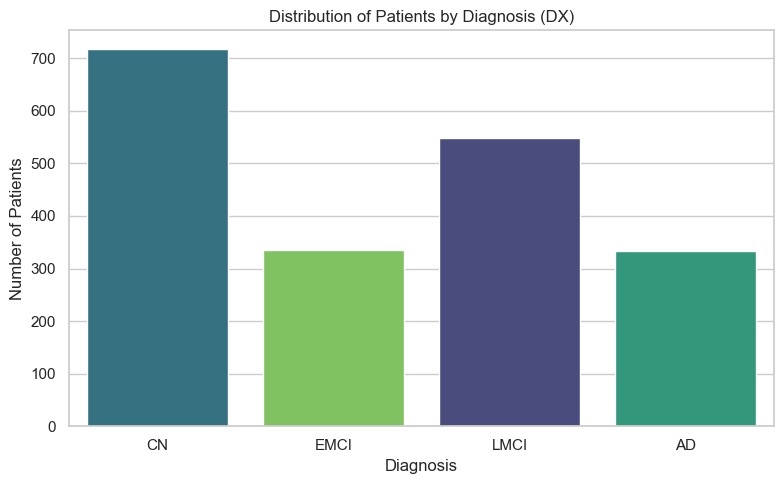

In [5]:
# Map numeric DX codes to diagnosis labels
dx_labels = {
    0: "CN",    # Cognitively Normal
    1: "EMCI",  # Early Mild Cognitive Impairment
    2: "LMCI",  # Late Mild Cognitive Impairment
    3: "AD"     # Alzheimer’s Disease
}

# Create a new column with the mapped labels
viz.dataset["DX_label"] = viz.dataset['DX'].map(dx_labels)
viz.count_plot(
    x="DX_label",
    figsize=(8, 5),
    palette="viridis",
    order = ["CN", "EMCI", "LMCI", "AD"],
    xlabel="Diagnosis",
    ylabel="Number of Patients",
    title="Distribution of Patients by Diagnosis (DX)"
)

In [6]:
print(dataset['DX'].value_counts())

DX
0    717
2    548
1    336
3    333
Name: count, dtype: int64


We see that: 
- CN:   717 -> 37.07%
- EMCI: 336 -> 17.37%
- LMCI: 548 -> 28.34%
- AD:   333 -> 17.22%

CN is the largest class, followed by LMCI, EMCI and AD. This means that the distribution is not uniform: CN dominates the sample, but the other classes are not rare. **This means that the classes are slightly unbalanced and that more care must be taken in building machine learning models and evaluating those models.**

The most robust options for handling this slight imbalance in classes are tree-based models and using class weights. Furthermore, we can't rely solely on Accuracy. 

## Demographics Analysis

Now we analyze the patients' demographics informations. 

### Sex (PTGENDER)

In [7]:
gender_map = {1: "Male", 0: "Female"}
print(viz.dataset['PTGENDER'].map(gender_map).value_counts())

PTGENDER
Male      1026
Female     908
Name: count, dtype: int64


We note that the male/female ratio is very close to 1. Males make up approximately 52.6% of the sample, while females make up approximately 47.4%. Therefore, we find ourselves in a relatively balanced context with regards to gender and therefore there is no serious imbalance in the data.

In [8]:
viz.dataset['Gender_label'] = viz.dataset['PTGENDER'].map(gender_map)
ct = pd.crosstab(viz.dataset['Gender_label'], viz.dataset['DX_label'], normalize='index')
ct = ct.reindex(columns=['CN', 'EMCI', 'LMCI', 'AD'])
ct


DX_label,CN,EMCI,LMCI,AD
Gender_label,,,,
Female,0.439427,0.167401,0.235683,0.157489
Male,0.309942,0.179337,0.325536,0.185185


Let's interpret the values:
- **Female:**
    - **CN (43.93%):** women have a relatively high rate of cognitively normal.
    - **EMCI (16.74%):** similar to males (18,98%).
    - **LMCI (23.57%):** much lower than males.
    - **AD (15.75%):**  slightly lower than males.
- **Male:**
    - **CN (30.99%):** much lower than females.
    - **EMCI (17.93%):** similar to females (18,32%). 
    - **LMCI (32.55%):** much higher (dominant in males).
    - **AD (18.52%):** slightly higher than females.

In our dataset, therefore, males are more affected by more severe forms of senile dementia than females who are statistically healthier.
This is a bias in the dataset, as in reality [more women develop Alzheimer's than men](https://pmc.ncbi.nlm.nih.gov/articles/PMC10321561/) (both due to their greater longevity, but also for other biological reasons that may be linked to estrogen or amyloid). 

That's why we now control sex based on age and the APOE4 allele.

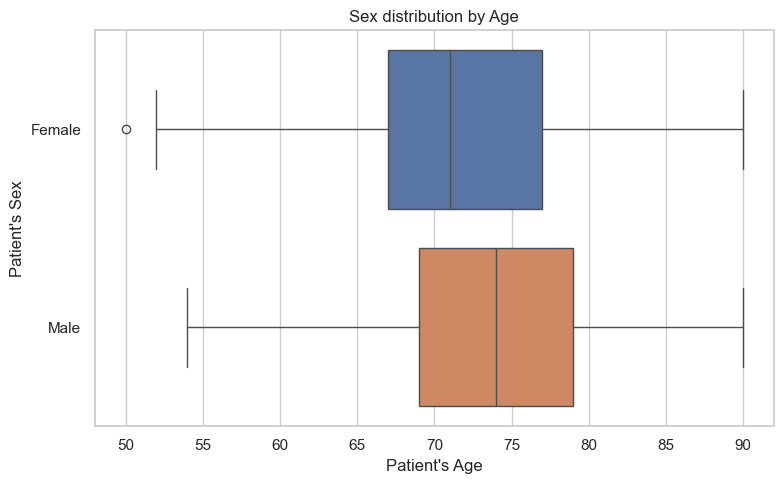

In [9]:
viz.dataset['Gender_label'] = viz.dataset['PTGENDER'].map(gender_map)
viz.box_plot(x="AGE", 
             y="Gender_label", 
             figsize=(8, 5),
             xlabel="Patient's Age",
             ylabel="Patient's Sex",
             title="Sex distribution by Age")

We note that males in the dataset are **slightly older** and this may be a possible factor explaining why they have more **LMCI** and **AD**.

In [10]:
pd.crosstab(viz.dataset["Gender_label"], viz.dataset["APOE4"])

APOE4,0,1,2
Gender_label,,,
Female,500,329,79
Male,547,383,96


In percentages:
- **Females:** 55.29% (0), 36.42% (1), 8.29% (2).
- **Males:** 53.20% (0), 36.48% (1), 10.32% (2).

APOE4 distributions are very similar between the sexes. Overall, APOE4 genetics are balanced between men and women in this dataset.

*We can conclude that the most severe diagnoses of senile dementia are in men since in this dataset they tend to be older and have a slightly higher presence of APOE4.*

### Age

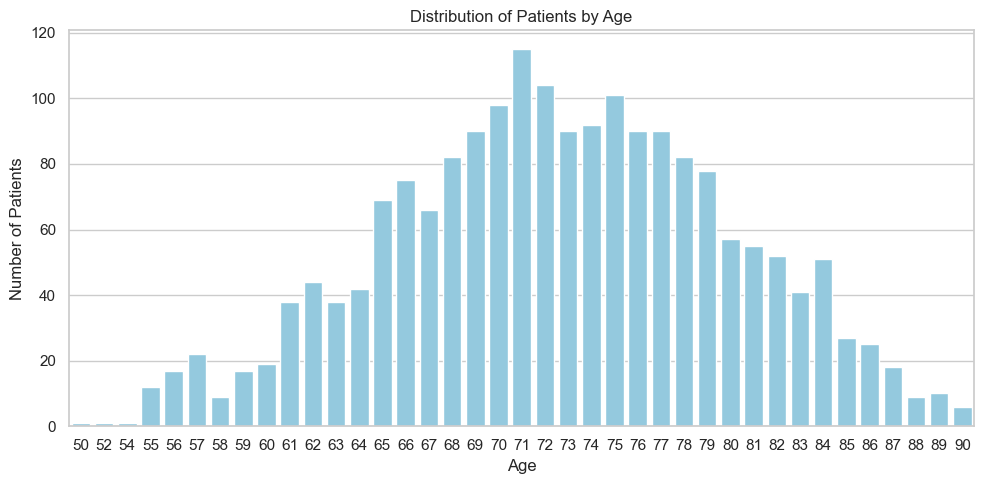

In [11]:
viz.bar_plot(x="AGE", 
            figsize=(10, 5),
            color="skyblue",
            xlabel="Age",
            ylabel="Number of Patients",
            title="Distribution of Patients by Age")


The age of the patients ranges from 50 to 91 years and is concentrated around the seventies.

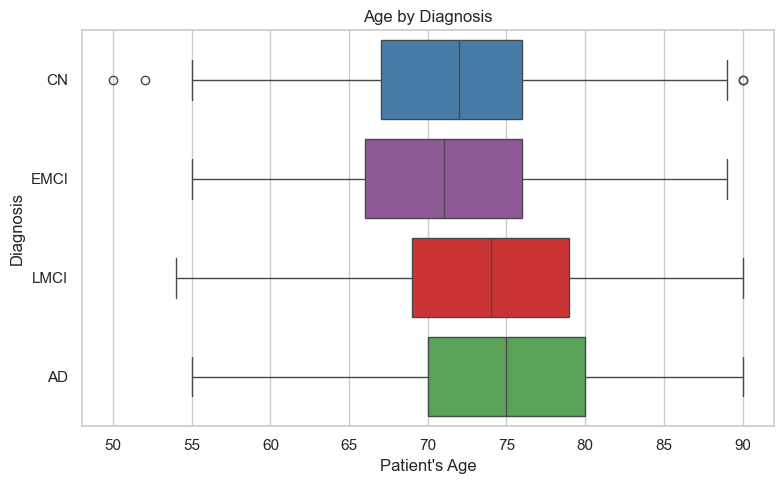

In [12]:
viz.box_plot(x="AGE", 
             y="DX_label", 
             figsize=(8, 5),
             palette="Set1",
             order=['CN', 'EMCI', 'LMCI', 'AD'],
             xlabel="Patient's Age",
             ylabel="Diagnosis",
             title="Age by Diagnosis")

Let's make some observations about the boxplot.
- The medians of **AD** and **LMCI** appear to be shifted toward higher age values ​​compared to other diagnoses. This indicates that subjects with more severe diagnoses tend to be older. Obviously, this is consistent with reality. 
- It's strange that **CN** has a greater median than **EMCI**. This is likely due to dataset bias.
- The **CN** and **LMCI** groups show very extended *whiskers* (the two lines outside the box extended to Minimum and Maximum). Therefore, there is greater age variability in these groups.
- *Outliers* are noted for values ​​close to 50 and for values ​​close to 90, but only for **SMC** and **EMCI**.
- Although the medians differ, the IQRs and whiskers overlap significantly. Therefore, age alone does not perfectly separate the diagnostic categories.

*Age is clearly associated with diagnosis (the more severe the diagnosis, the older the patient), but it is not a perfect separator: the intervals overlap a lot, so on its own it does not classify patients well.*

### Educational Level (PTEDUCAT)

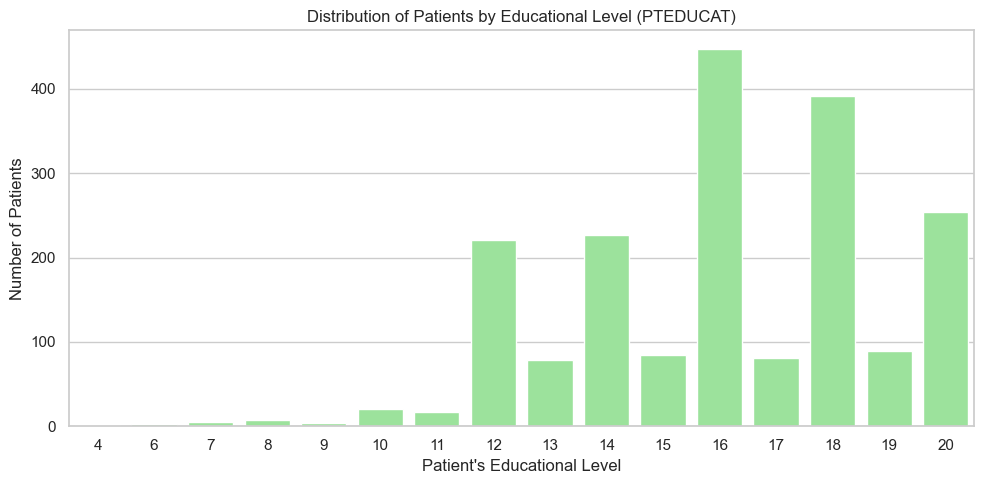

In [13]:
viz.count_plot(
    x="PTEDUCAT",
    figsize=(10, 5),
    color="lightgreen",
    xlabel="Patient's Educational Level",
    ylabel="Number of Patients",
    title="Distribution of Patients by Educational Level (PTEDUCAT)"
)

In [14]:
print(dataset['PTEDUCAT'].value_counts())

PTEDUCAT
16    447
18    392
20    254
14    227
12    221
19     89
15     84
17     81
13     79
10     21
11     17
8       8
7       5
9       4
6       3
4       2
Name: count, dtype: int64


La maggior parte delle persone presenti nel dataset ha un'istruzione di almeno 10 anni. 

In [15]:
ct = pd.crosstab(viz.dataset['PTEDUCAT'], viz.dataset['DX_label'], normalize='index')
ct = ct.reindex(columns=['CN', 'EMCI', 'LMCI', 'AD'])
display(ct)

DX_label,CN,EMCI,LMCI,AD
PTEDUCAT,,,,
4,0.000000,0.000000,0.500000,0.500000
6,0.333333,0.000000,0.333333,0.333333
7,0.400000,0.000000,0.400000,0.200000
8,0.250000,0.000000,0.375000,0.375000
9,0.000000,0.000000,0.500000,0.500000
10,0.238095,0.000000,0.428571,0.333333
11,0.058824,0.176471,0.470588,0.294118
12,0.217195,0.203620,0.316742,0.262443
13,0.303797,0.215190,0.265823,0.215190


### APOE4

**APOE** (Apolipoprotein E) is a gene that encodes a protein involved in the transport of lipids in the blood and brain. [The **ε4** allele increases the risk of developing Alzheimer's, especially if present in two copies](https://pubmed.ncbi.nlm.nih.gov/8618665/). When genetic testing is done, the number of copies of the ε4 allele a person has is counted:
- **0:** No copies of APOE4 do not increase the risk of Alzheimer's.
- **1:** One copy of APOE4 leads to an increased risk of Alzheimer's.
- **2:** Two copies of APOE4 lead to a significantly higher risk of Alzheimer's.

APOE4 does not itself cause Alzheimer's, but it is a significant risk factor.

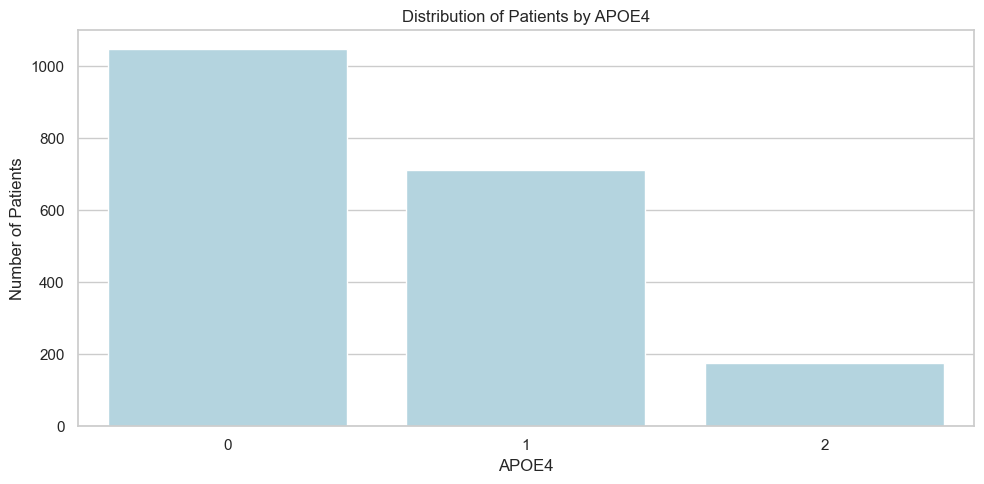

In [16]:
viz.count_plot(
    x="APOE4",
    figsize=(10, 5),
    color="lightblue",
    xlabel="APOE4",
    ylabel="Number of Patients",
    title="Distribution of Patients by APOE4"
)

In [17]:
print(dataset['APOE4'].value_counts())
print("")
print(dataset['APOE4'].value_counts(normalize=True) * 100)


APOE4
0    1047
1     712
2     175
Name: count, dtype: int64

APOE4
0    54.136505
1    36.814891
2     9.048604
Name: proportion, dtype: float64


The majority of participants have no ε4 alleles (APOE4=0). Approximately 36% have at least one ε4 allele, with a minority (9%) having two alleles.

In [18]:
ct = pd.crosstab(viz.dataset['APOE4'], viz.dataset['DX_label'], normalize='index')
ct = ct.reindex(columns=['CN', 'EMCI', 'LMCI', 'AD'])
display(ct)

DX_label,CN,EMCI,LMCI,AD
APOE4,,,,
0,0.472779,0.185291,0.235912,0.106017
1,0.283708,0.167135,0.332865,0.216292
2,0.114286,0.131429,0.365714,0.388571


- **CN** and **EMCI** decreases with increasing ε4 alleles.
- **LMCI** and **AD** increase with ε4.

## Clinical and Composite Scores Analysis

Clinical Scores are `MMSE`, `CDRSB`, `ADAS13`, `LDELTOTAL`, `FAQ`, `MOCA`, `TRABSCOR` `RAVLT_immediate`, `RAVLT_learning`, `RAVLT_perc_forgetting`. The only remaining Composite Score is `mPACCdigit` We calculate the mean, median, std, min, max, and quartiles for each score.

In [19]:
scores = ["MMSE", "CDRSB", "ADAS13", "LDELTOTAL", "FAQ", "MOCA", "TRABSCOR",
          "RAVLT_immediate", "RAVLT_learning", "RAVLT_perc_forgetting", "mPACCdigit"]

dataset[scores].describe().T

,count,mean,std,min,25%,50%,75%,max
MMSE,1934.0,27.367115,2.664296,16.0000,26.000000,28.0000,29.000000,30.00000
CDRSB,1934.0,1.466391,1.777207,0.0000,0.000000,1.0000,2.000000,10.00000
ADAS13,1934.0,15.868149,9.550134,0.0000,9.000000,14.0000,22.000000,56.00000
LDELTOTAL,1934.0,7.798862,5.440301,0.0000,3.000000,8.0000,12.000000,22.00000
FAQ,1934.0,3.797311,6.036471,0.0000,0.000000,1.0000,5.000000,30.00000
MOCA,1934.0,22.904343,4.147769,4.0000,21.000000,23.0000,26.000000,30.00000
TRABSCOR,1934.0,118.364012,74.285441,21.0000,67.000000,91.0000,141.000000,300.00000
RAVLT_immediate,1934.0,36.711479,12.723674,0.0000,27.000000,36.0000,46.000000,71.00000
RAVLT_learning,1934.0,4.479317,2.790928,-4.0000,2.000000,4.0000,7.000000,12.00000
RAVLT_perc_forgetting,1934.0,56.346538,34.645154,-50.0000,26.666700,55.5556,100.000000,100.00000


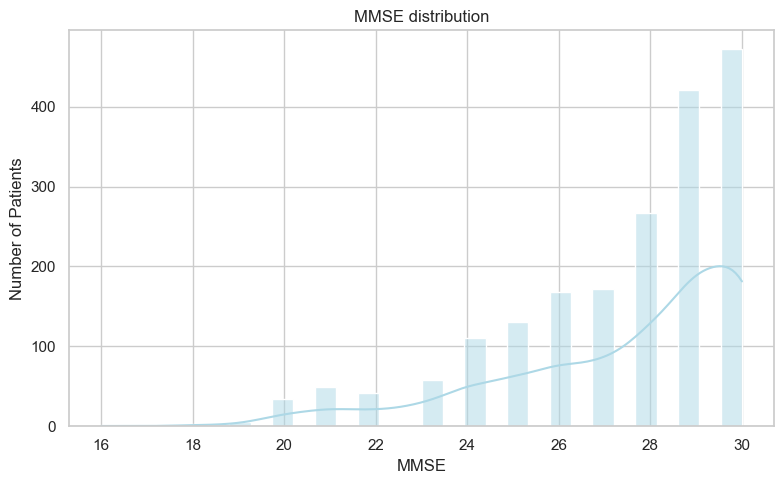

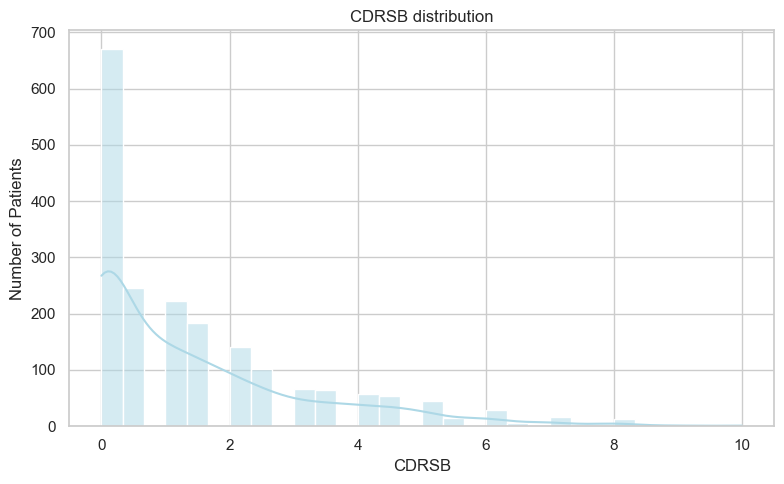

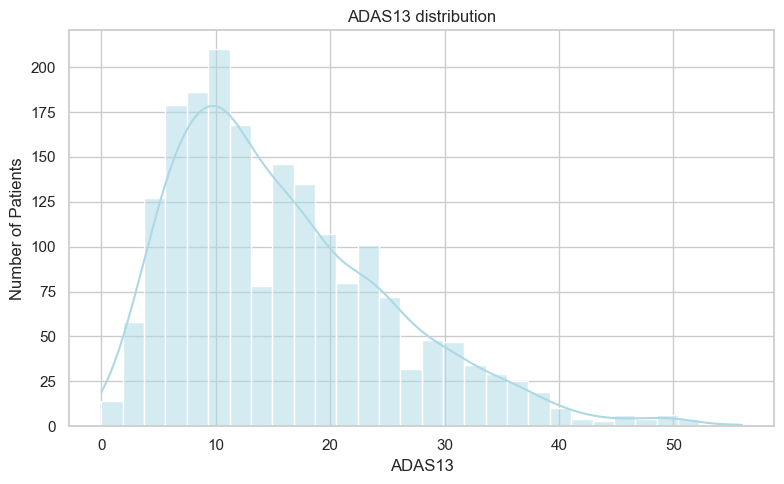

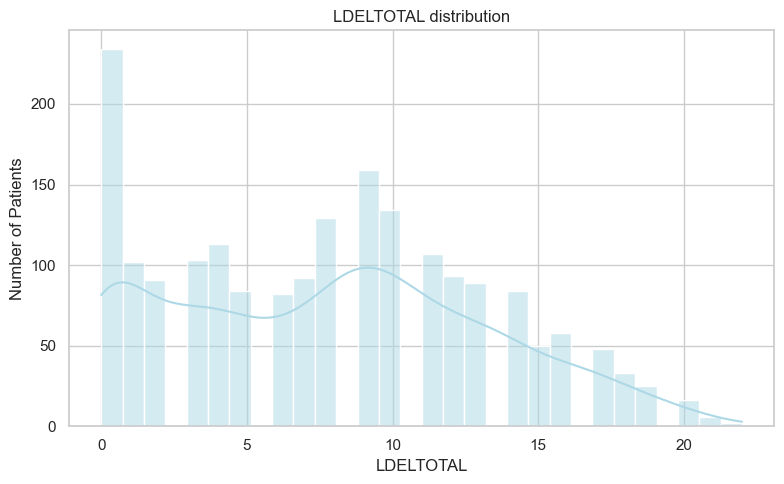

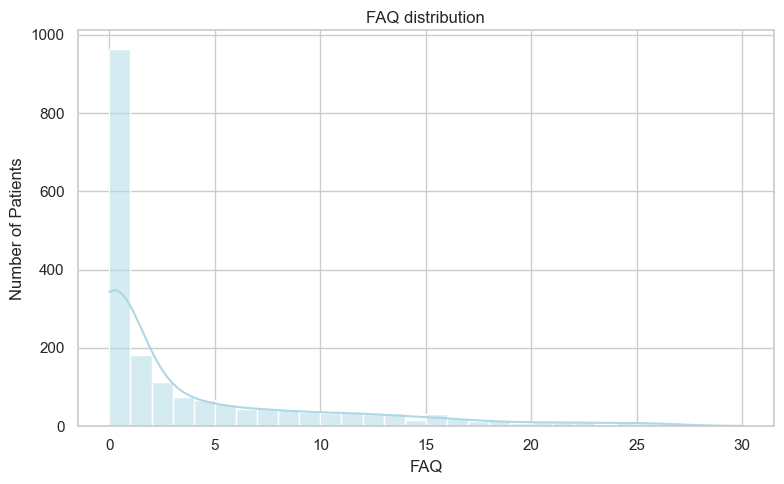

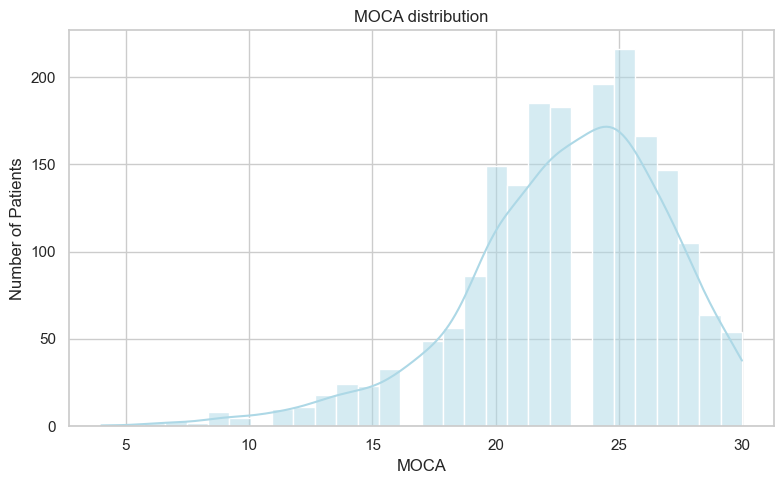

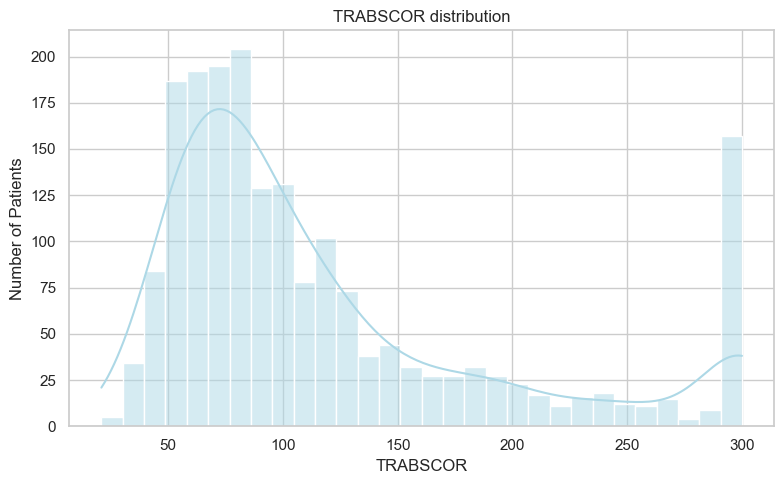

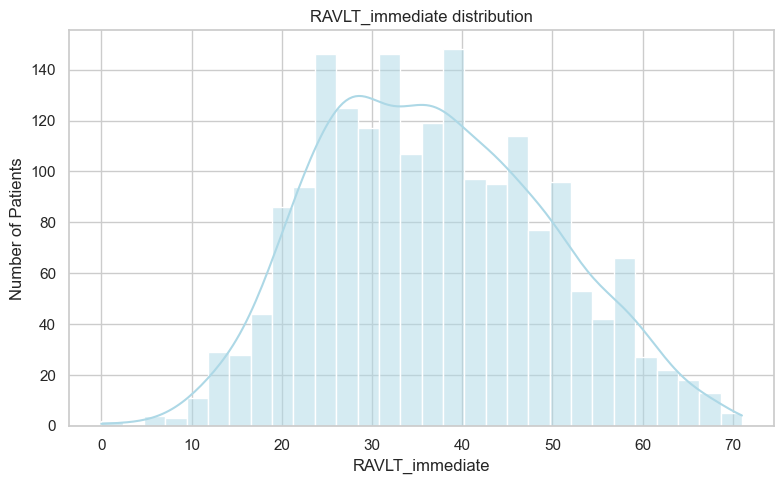

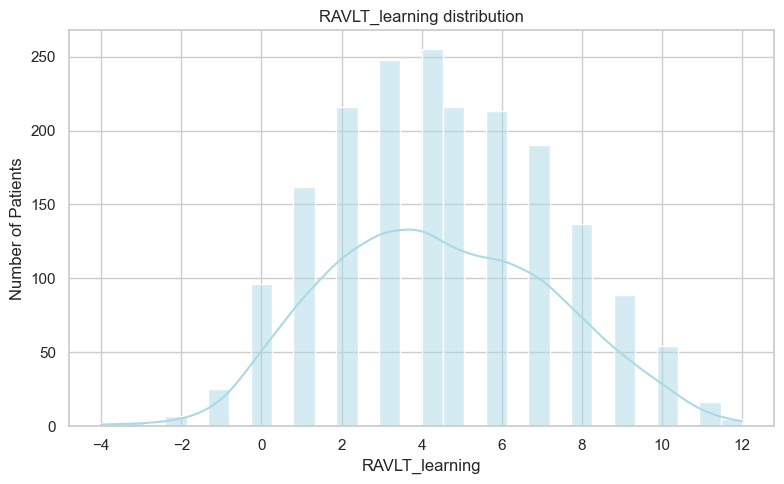

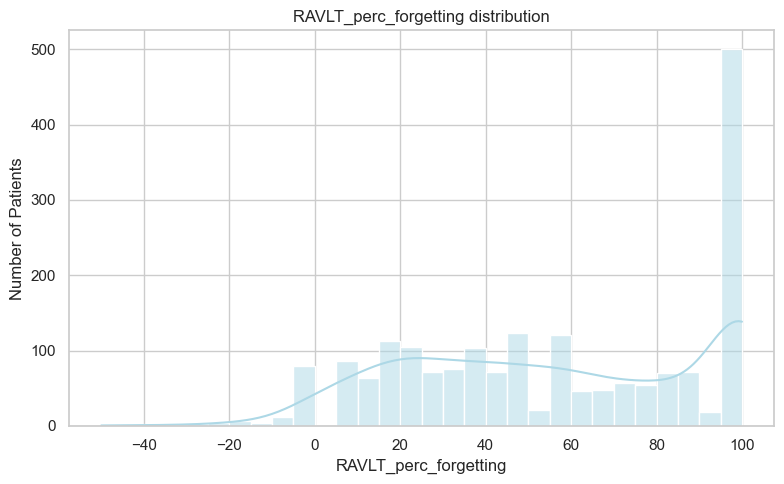

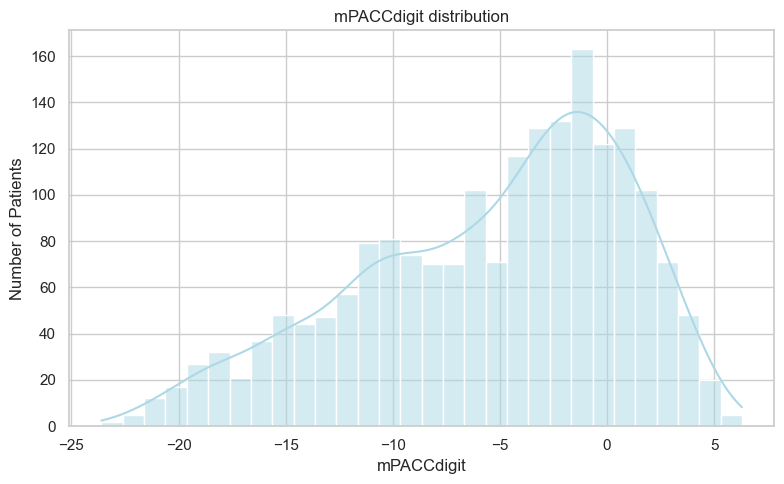

In [20]:
for col in scores:
    viz.histogram(
        x=col,
        figsize=(8, 5),
        color="lightblue",
        kde=True,
        xlabel=col,
        ylabel="Number of Patients",
        title=f"{col} distribution"
    )

Many scores (`MMSE`, `MOCA`, `LDELTOTAL`, `RAVLT_immediate`) show skewed, tailed (non-Gaussian) distributions. `TRABSCOR` and `RAVLT_perc_forgetting` have extreme tails and many outliers.

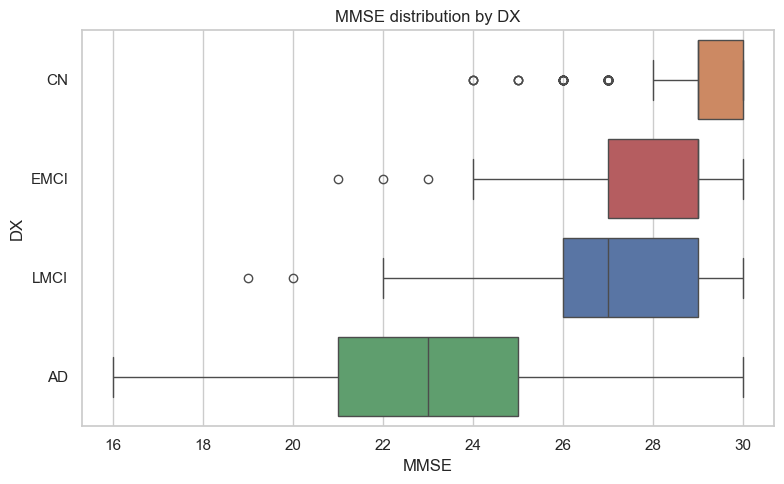

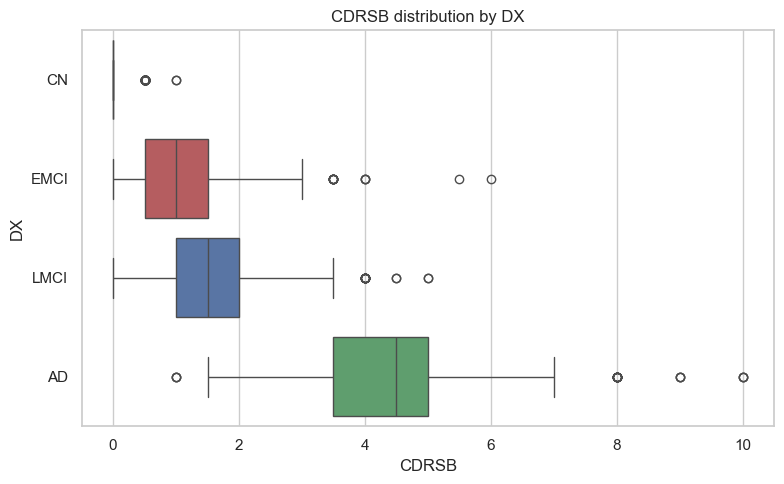

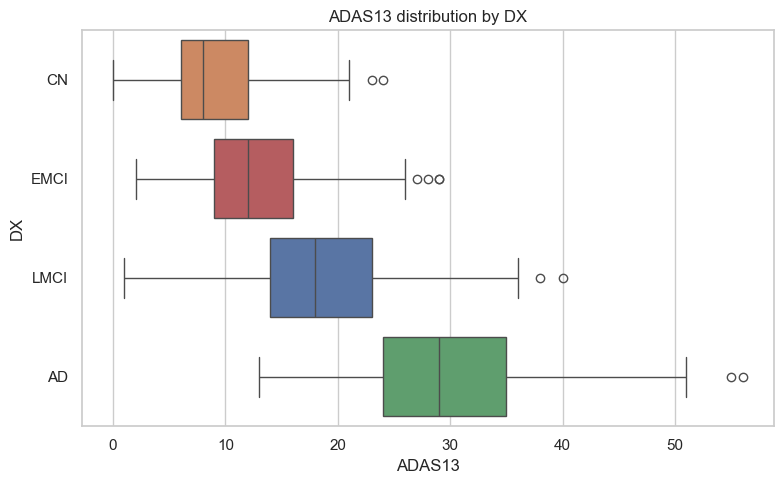

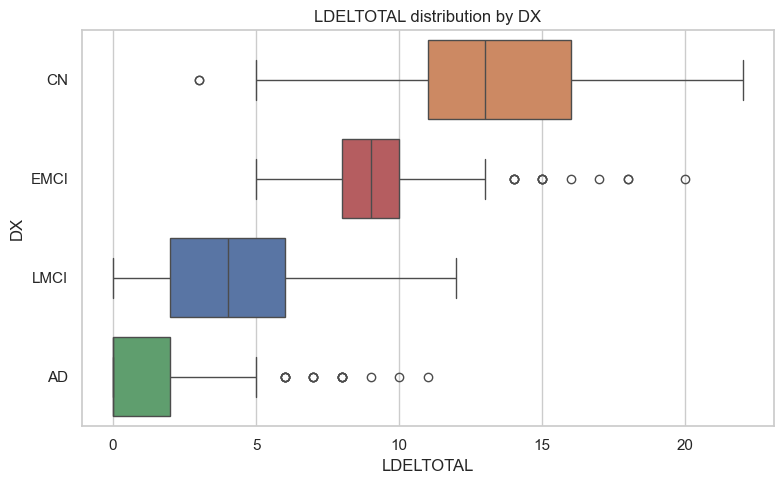

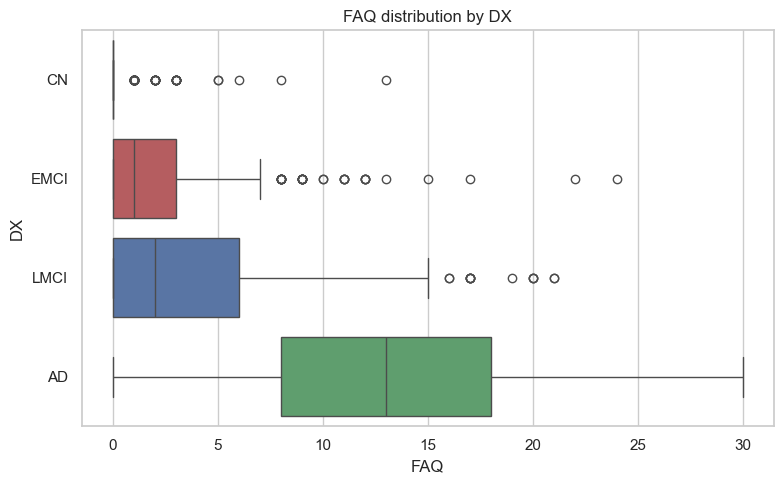

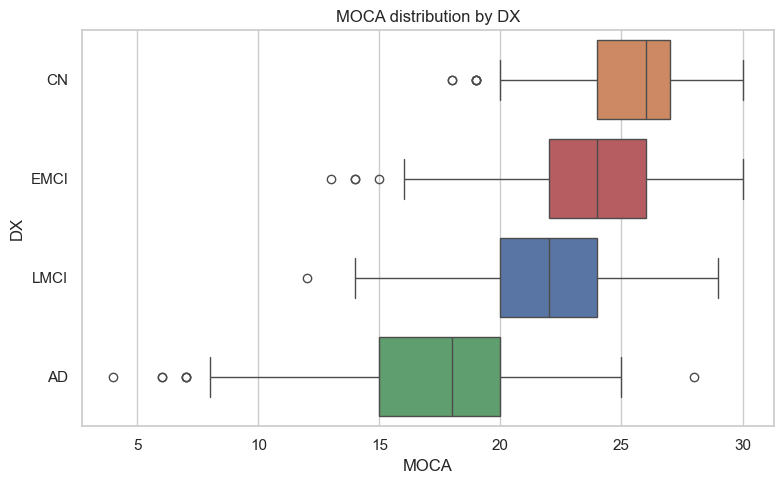

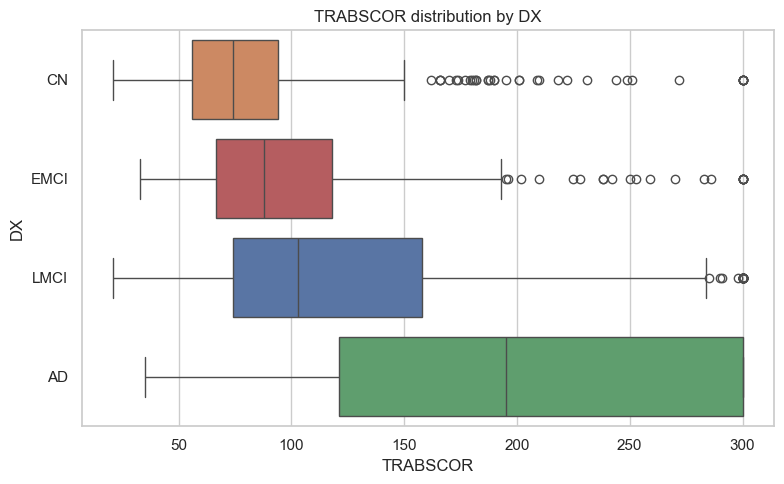

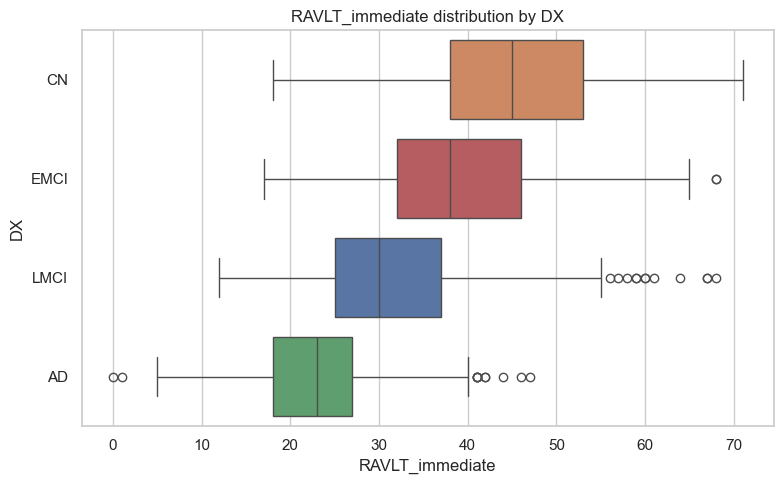

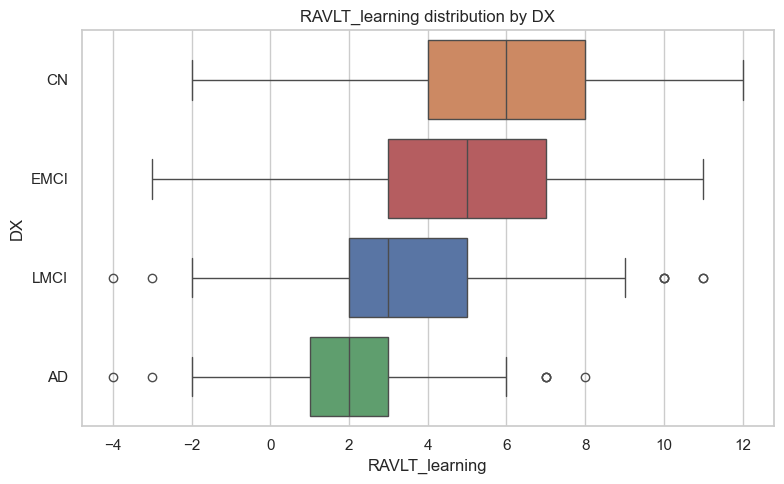

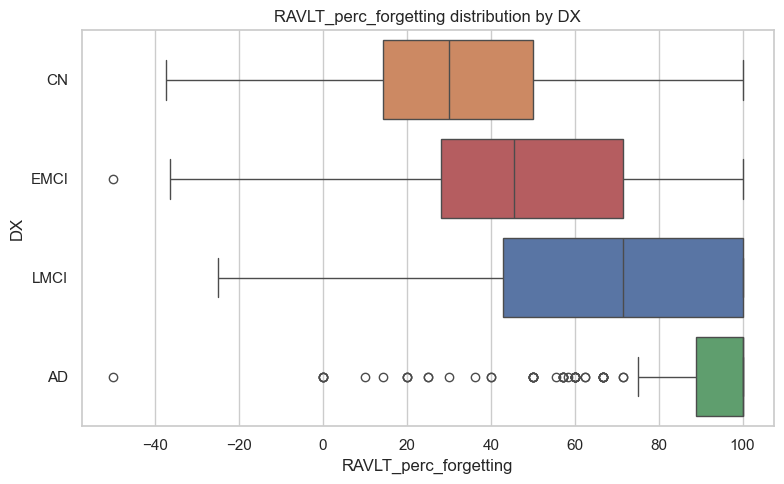

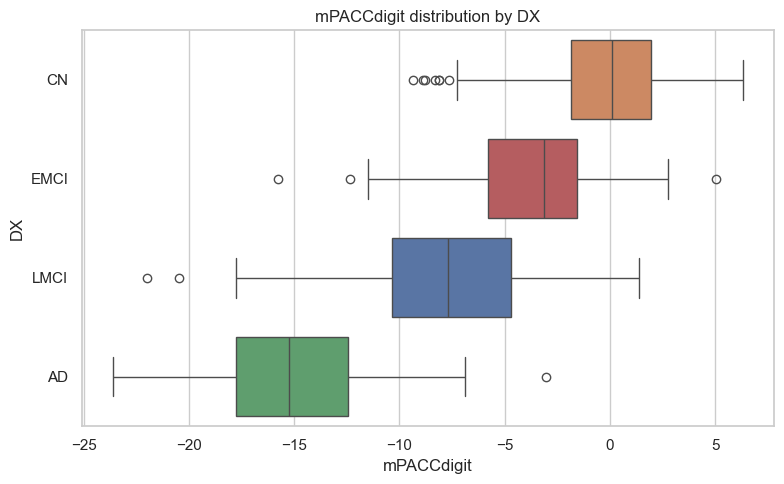

In [21]:
for col in scores:
    viz.box_plot(
        x=col,
        y="DX_label",
        figsize=(8, 5),
        order=['CN', 'EMCI', 'LMCI', 'AD'],
        xlabel=col,
        ylabel='DX',
        title=f"{col} distribution by DX"
    )

The expected patterns are observed: moving from **CN** to **AD**, the `MMSE`, `MOCA`, `LDELTOTAL`, `RAVLT_immediate` and `RAVLT_learning` scores tend to decrease, while `CDRSB`, `ADAS13`, `FAQ`, `TRABSCOR`, `RAVLT_perc_forgetting`, and `mPACCdigit` progressively increase. However, the interquartile ranges (*IQR*) of the different classes show strong overlap, indicating a high degree of overlap between the groups.

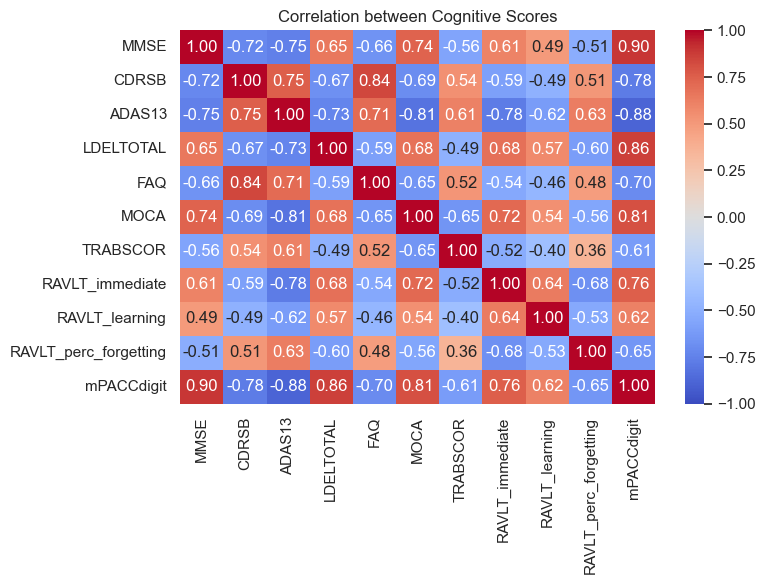

In [22]:
viz.heatmap_corr(cols=scores,
                 annot=True, 
                 cmap="coolwarm",
                 title="Correlation between Cognitive Scores")

There is significant collinearity between the cognitive scores and thus a risk of multicollinearity in the models. There is significant collinearity among the cognitive scores and therefore a risk of multicollinearity in the models. This leads us to use tree-based models for prediction that handle collinearity well.

## EcogPT Analysis

Now we go with `EcogPT` measures. The EcogPt attributes derive from the Everyday Cognition scale – Patient version, i.e. the version self-completed by the patient. A higher score indicates worse daily functioning.
- `EcogPTMem`: Everyday memory (e.g., remembering appointments or where things are placed)
- `EcogPTLang`: Language and communication (e.g., finding words, understanding conversations)
- `EcogPTVisspat`: Visuospatial skills (e.g., orienting oneself, following maps, recognizing routes)
- `EcogPTPlan`: Planning and organizing daily activities
- `EcogPTOrgan`: General organization and management of complex tasks
- `EcogPTDivatt`: Attention and ability to manage multiple tasks simultaneously (divided attention)

In [23]:
scores = ["EcogPtMem", "EcogPtLang", "EcogPtVisspat", "EcogPtPlan", "EcogPtOrgan", "EcogPtDivatt"]
dataset[scores].describe().T

,count,mean,std,min,25%,50%,75%,max
EcogPtMem,1934.0,2.088507,0.645835,1.0,1.62500,2.000000,2.500000,4.0
EcogPtLang,1934.0,1.735818,0.571230,1.0,1.28889,1.652778,2.066666,4.0
EcogPtVisspat,1934.0,1.397331,0.478091,1.0,1.00000,1.276192,1.571430,4.0
EcogPtPlan,1934.0,1.413471,0.489819,1.0,1.00000,1.240000,1.600000,4.0
EcogPtOrgan,1934.0,1.503542,0.535970,1.0,1.10000,1.366666,1.700000,4.0
EcogPtDivatt,1934.0,1.791779,0.650359,1.0,1.25000,1.750000,2.050000,4.0


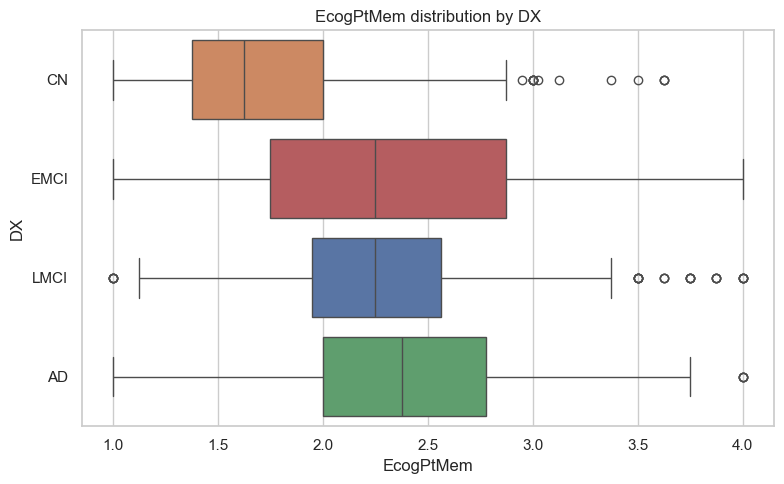

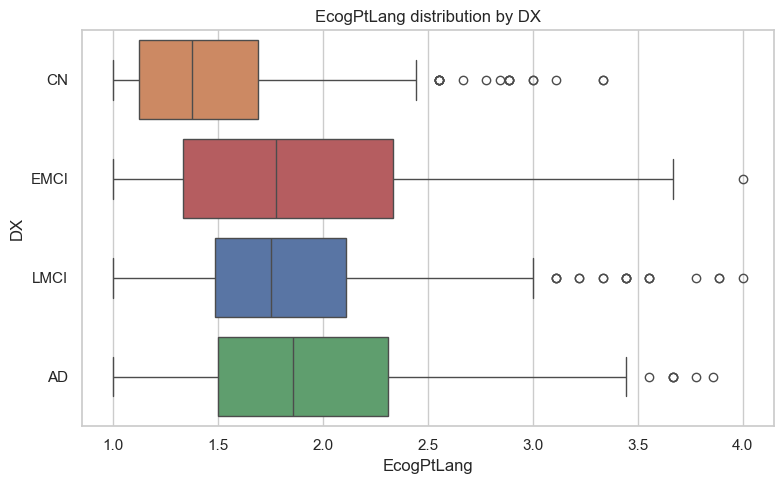

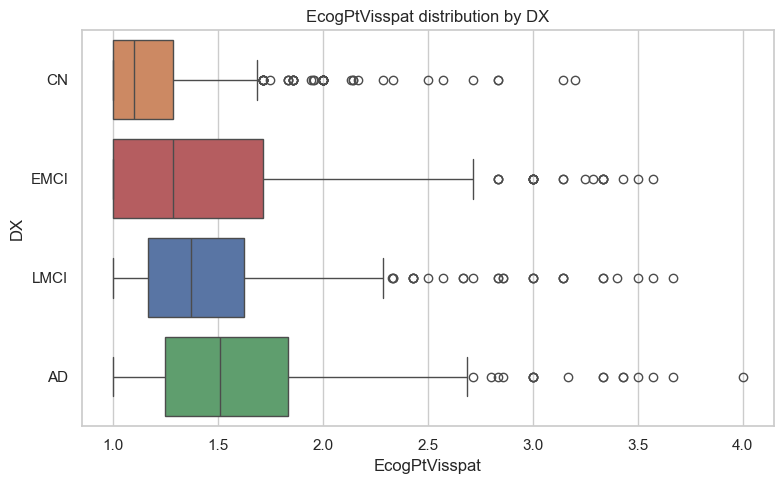

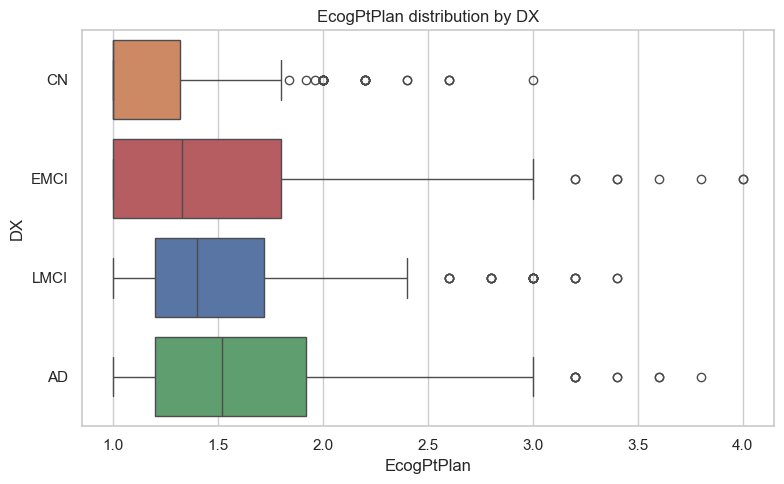

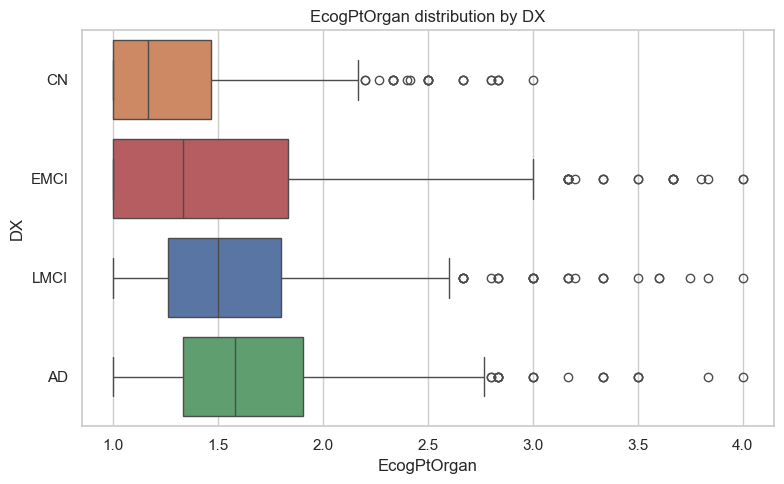

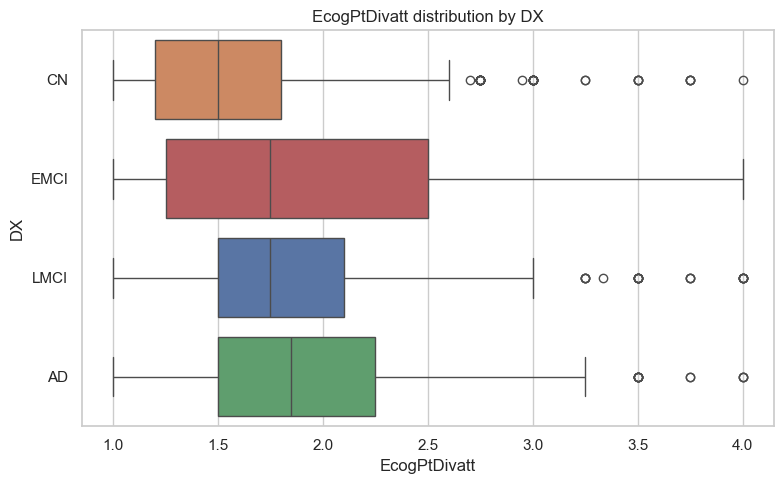

In [24]:
for col in scores:
    viz.box_plot(
        x=col,
        y="DX_label",
        figsize=(8, 5),
        order=['CN', 'EMCI', 'LMCI', 'AD'],
        xlabel=col,
        ylabel='DX',
        title=f"{col} distribution by DX"
    )

Self-reported scores (`EcogPt`) increase with severity of diagnosis, however variability is moderate and some subscales show limited dispersion (many values ​​close to 1–2). `EcogPT` are informative but less discriminatory than EcogSPs. This is expected because the subject will be much more biased than other external people.

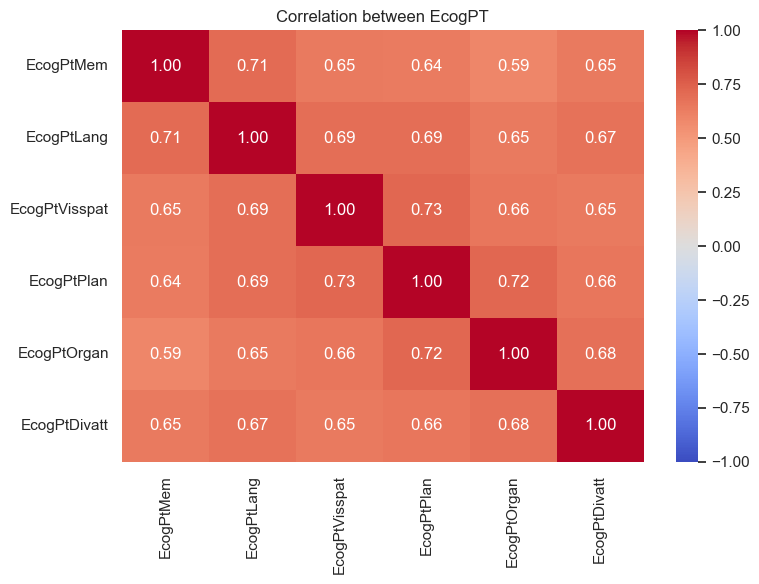

In [25]:
viz.heatmap_corr(cols=scores,
                 annot=True, 
                 cmap="coolwarm",
                 title="Correlation between EcogPT")

Here too we have that the `EcogPT` are strongly correlated.

## EcogSP Analysis

Now we go with `EcogSP` measures. The EcogSP attributes are taken from the Everyday Cognition Scale – Study Partner version. This version is completed by a family member or study partner to assess the patient's daily functioning. A higher score indicates worse daily functioning.
- `EcogSPMem`: Everyday memory (e.g., remembering appointments or where things are placed)
- `EcogSPLang`: Language and communication (e.g., finding words, understanding conversations)
- `EcogSPVisspat`: Visuospatial skills (e.g., orienting oneself, following maps, recognizing routes)
- `EcogSPPlan`: Planning and organizing daily activities
- `EcogSPOrgan`: General organization and management of complex tasks
- `EcogSPDivatt`: Attention and ability to manage multiple tasks simultaneously (divided attention)

In [26]:
scores = ["EcogSPMem", "EcogSPLang", "EcogSPVisspat", "EcogSPPlan", "EcogSPOrgan", "EcogSPDivatt"]
dataset[scores].describe().T

,count,mean,std,min,25%,50%,75%,max
EcogSPMem,1934.0,2.091302,0.880896,1.0,1.366965,1.875000,2.800000,4.0
EcogSPLang,1934.0,1.624446,0.676688,1.0,1.111110,1.375000,2.000000,4.0
EcogSPVisspat,1934.0,1.492943,0.667517,1.0,1.000000,1.169999,1.742856,4.0
EcogSPPlan,1934.0,1.592813,0.731944,1.0,1.000000,1.320000,1.957500,4.0
EcogSPOrgan,1934.0,1.694169,0.805823,1.0,1.000000,1.333334,2.133334,4.0
EcogSPDivatt,1934.0,1.886565,0.864373,1.0,1.050000,1.675002,2.500000,4.0


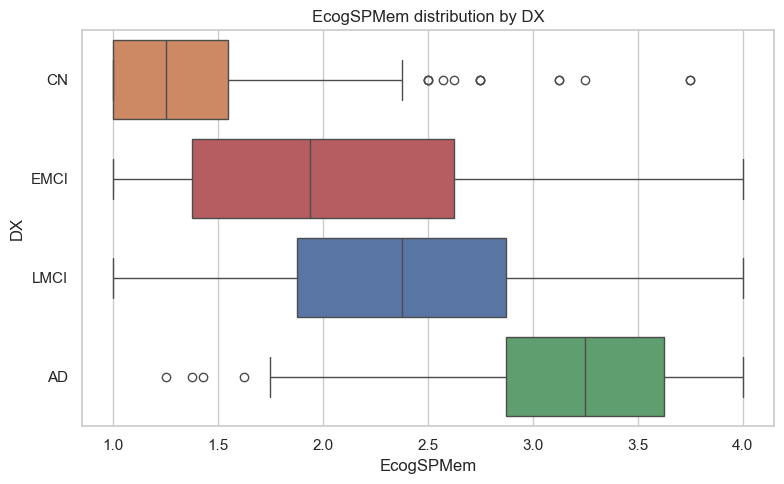

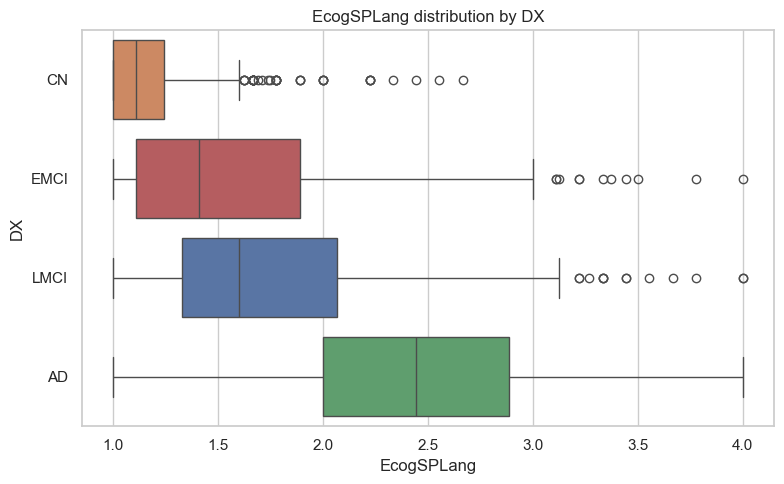

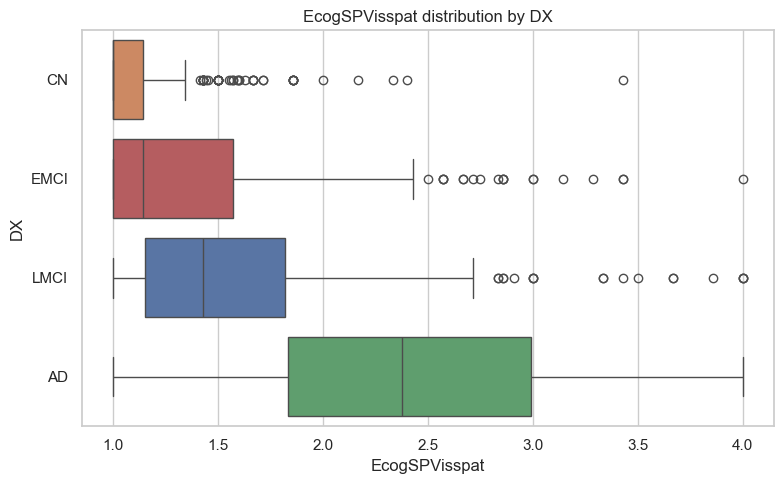

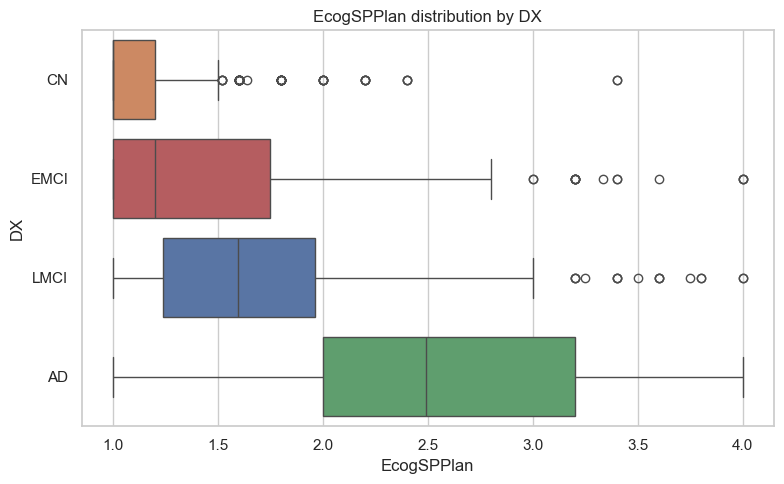

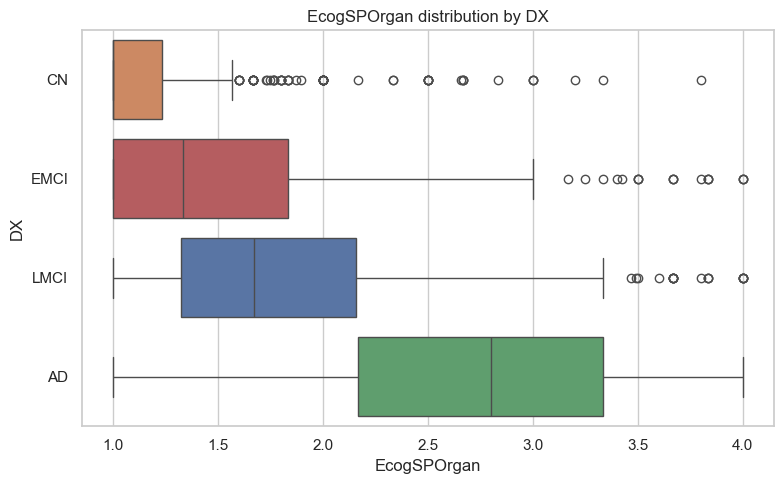

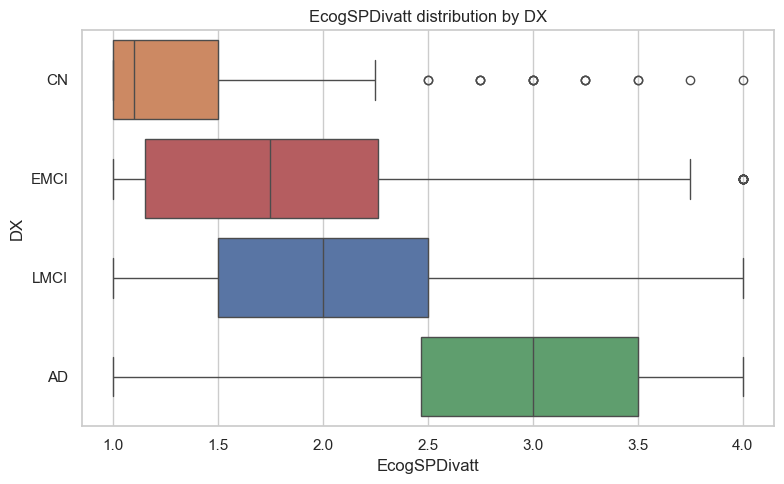

In [27]:
for col in scores:
    viz.box_plot(
        x=col,
        y="DX_label",
        figsize=(8, 5),
        order=['CN', 'EMCI', 'LMCI', 'AD'],
        xlabel=col,
        ylabel='DX',
        title=f"{col} distribution by DX"
    )

The `EcogSP` measures, based on informant reports, exhibit wider variability and, in several cases, a better ability to distinguish between **CN**, **LMCI**, **EMCI**, and **AD** than the corresponding `EcogPT` measures. In particular, the `EcogSPMem` exhibits both a higher mean and a greater variance.

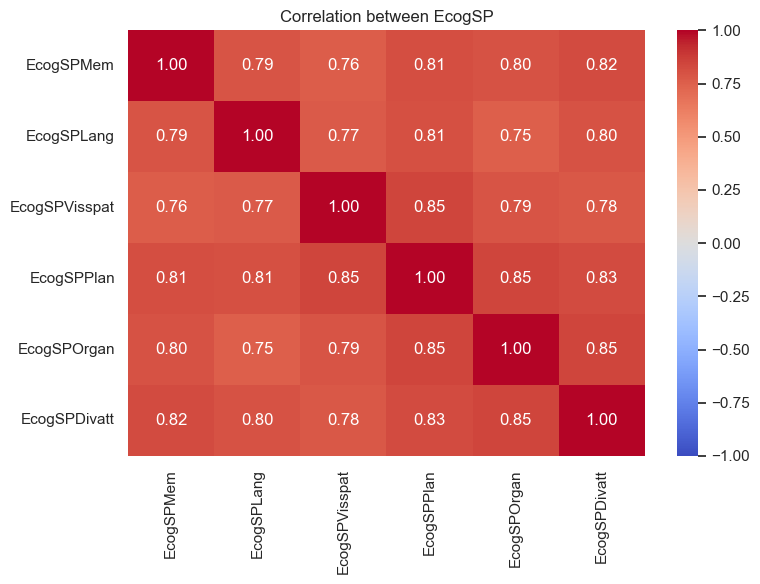

In [28]:
viz.heatmap_corr(cols=scores,
                 annot=True, 
                 cmap="coolwarm",
                 title="Correlation between EcogSP")

Here too, there is a strong internal correlation between subscales.

## Biomarkers Analysis

**Biomarkers** mainly refer to measurements obtained from cerebrospinal fluid (CSF) and PET imaging. They are biological and functional indicators that reflect the pathological processes of Alzheimer's disease (amyloidosis, tauopathy, and neurodegeneration). 

In [29]:
scores = ["PTAU/ABETA", "FDG"]
dataset[scores].describe().T

,count,mean,std,min,25%,50%,75%,max
PTAU/ABETA,1934.0,0.035138,0.027069,0.006020,0.015489,0.024756,0.049545,0.245297
FDG,1934.0,1.211806,0.146894,0.647497,1.118495,1.229130,1.313714,1.735930


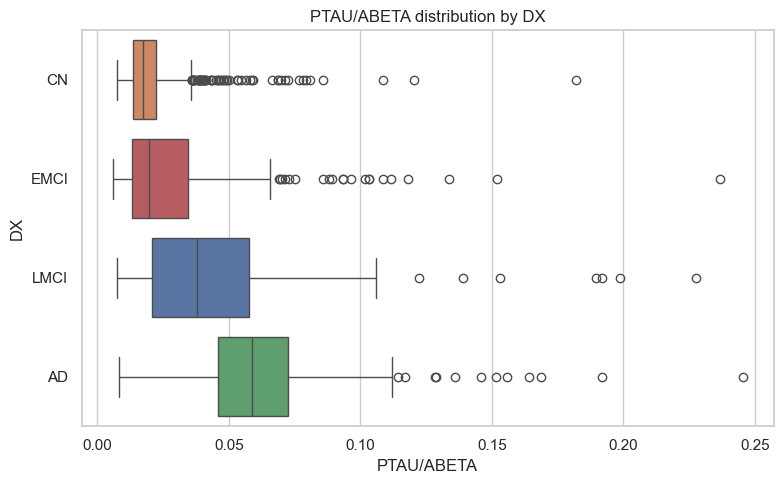

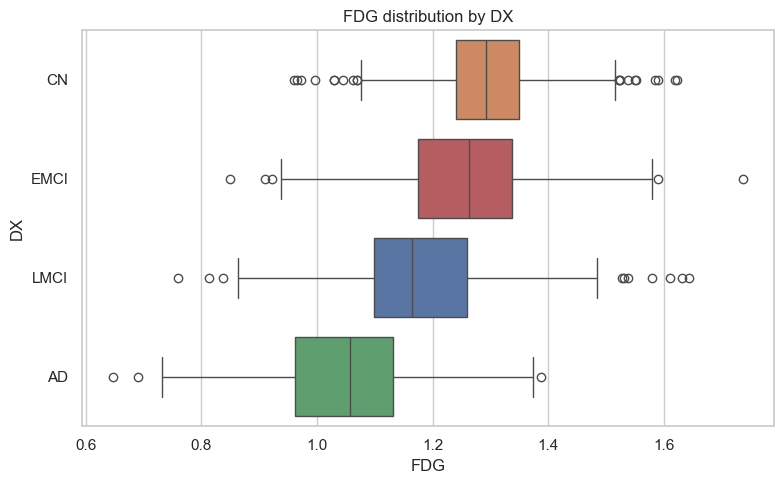

In [30]:
for col in scores:
    viz.box_plot(
        x=col,
        y="DX_label",
        figsize=(8, 5),
        order=['CN', 'EMCI', 'LMCI', 'AD'],
        xlabel=col,
        ylabel='DX',
        title=f"{col} distribution by DX"
    )

The `PTAU/ABETA` ratio shows an increasing trend with disease progression (**AD** > **LMCI** > **EMCI** > **CN**), while `FDG` values ​​tend to decrease with increasing clinical severity. However, the distributions of these indices are highly skewed and characterized by the presence of extreme outliers. We should also choose models that are robust to outliers. Overall, CSF biomarkers remain highly discriminatory and should contribute significant weight to the analysis models.

## MRI Analysis

**Magnetic Resonance Imaging** (**MRI**) measures the brain's volume obtained from structural MRI. These measures have been normalized to `ICV` (Intracranial Volume). They are:
- `Hippocampus/ICV` (relative hippocampal volume)
- `Entorhinal/ICV` (entorhinal cortex)
- `Fusiform/ICV` (fusiform gyrus)
- `MidTemp/ICV` (medial temporal cortex)
- `Ventricles/ICV` (ventricular volume)
- `WholeBrain/ICV` (total brain volume)

In [31]:
scores = ["Hippocampus/ICV", "Entorhinal/ICV", "Fusiform/ICV", "MidTemp/ICV", "Ventricles/ICV", "WholeBrain/ICV"]
dataset[scores].describe().T

,count,mean,std,min,25%,50%,75%,max
Hippocampus/ICV,1934.0,0.004587,0.000833,0.001998,0.003984,0.004619,0.005198,0.007087
Entorhinal/ICV,1934.0,0.002401,0.000555,0.000926,0.002044,0.002422,0.002764,0.005052
Fusiform/ICV,1934.0,0.011607,0.001725,0.005934,0.010445,0.011618,0.012806,0.017211
MidTemp/ICV,1934.0,0.013044,0.001904,0.006737,0.011705,0.013073,0.014350,0.019315
Ventricles/ICV,1934.0,0.025518,0.012700,0.004600,0.016115,0.022822,0.032105,0.078630
WholeBrain/ICV,1934.0,0.680556,0.054326,0.496226,0.642018,0.684041,0.720258,0.836141


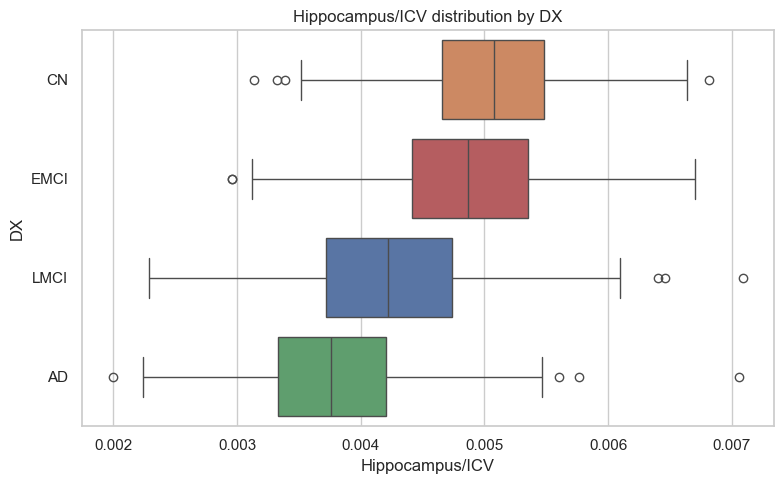

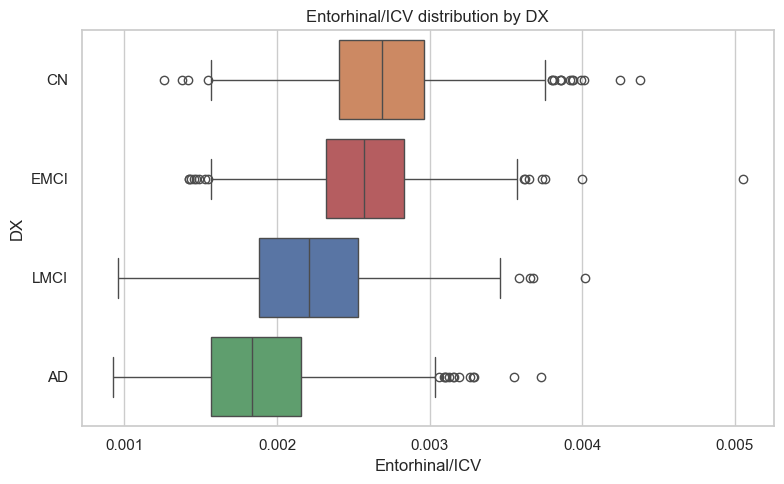

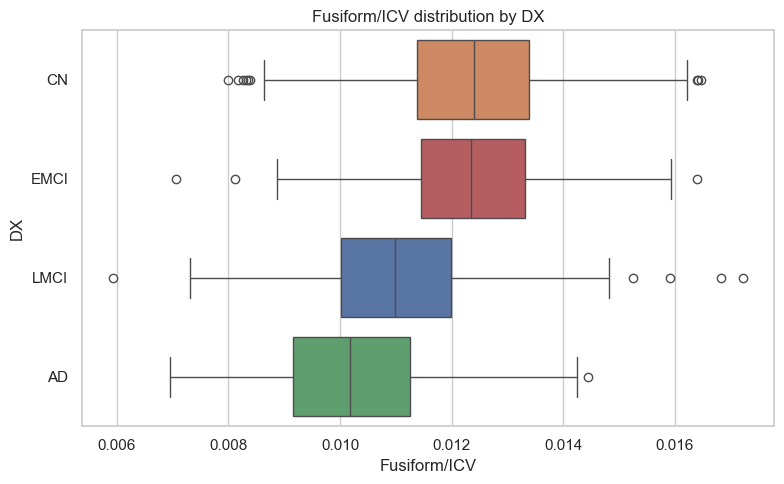

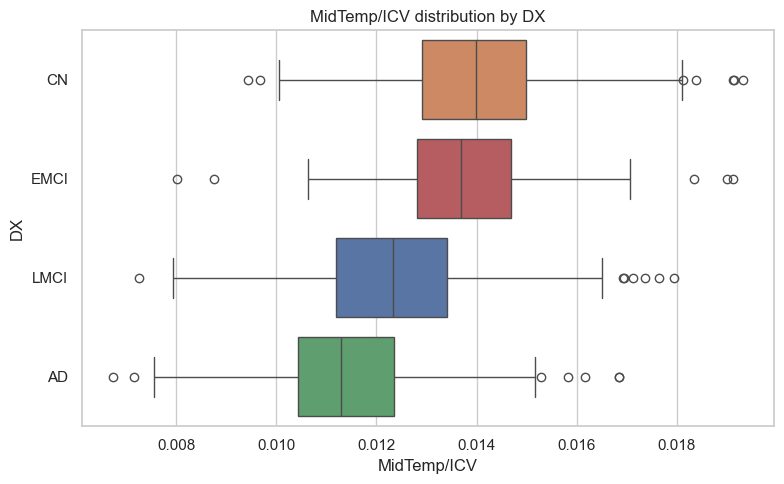

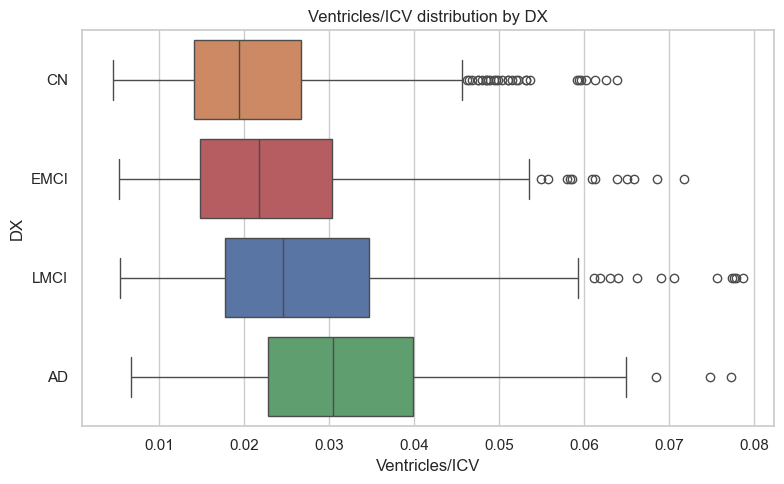

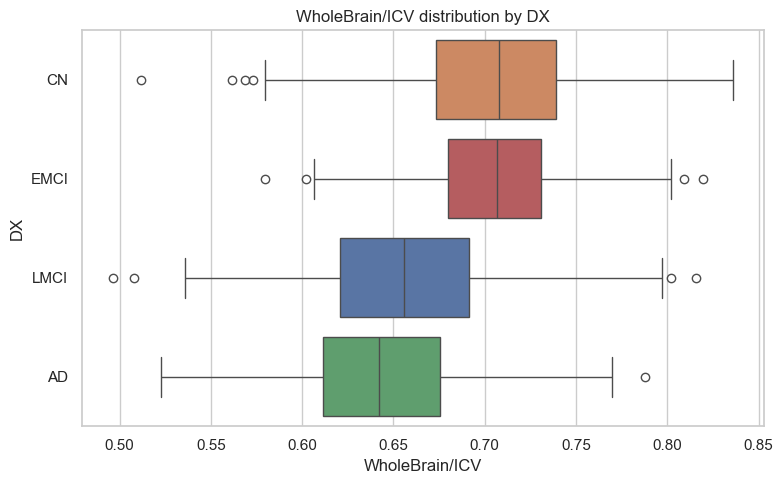

In [32]:
for col in scores:
    viz.box_plot(
        x=col,
        y="DX_label",
        figsize=(8, 5),
        order=['CN', 'EMCI', 'LMCI', 'AD'],
        xlabel=col,
        ylabel='DX',
        title=f"{col} distribution by DX"
    )

The observed patterns are consistent with neurodegenerative processes: the `Hippocampus/ICV`, `Entorhinal/ICV`, `Fusiform/ICV`, `Midtemp/ICV`, and `Wholebrain/ICV` ratios tend to decrease with increasing clinical severity, while `Ventricles/ICV` shows an increase. However, the interquartile ranges show a large overlap, indicating that the separation between the groups is not clear-cut.

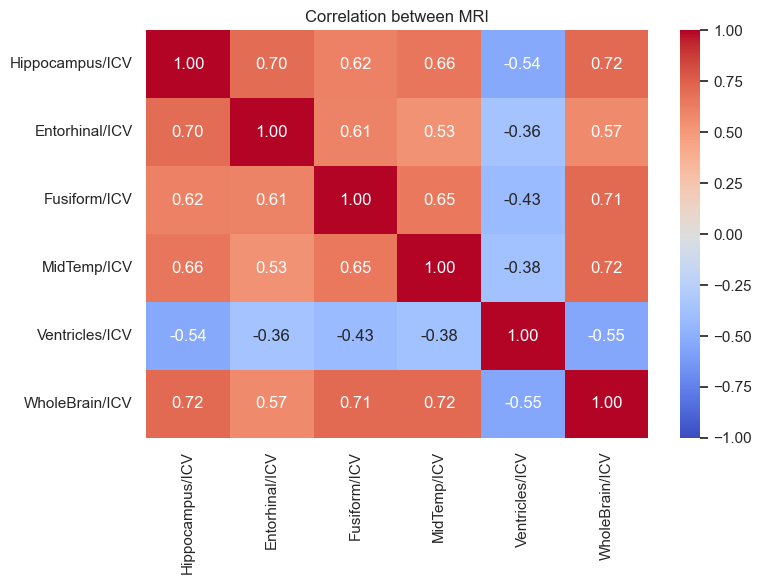

In [33]:
viz.heatmap_corr(cols=scores,
                 annot=True, 
                 cmap="coolwarm",
                 title="Correlation between MRI")

A high correlation between different regional volumes is also observed here, while the Ventricles/ICV ratio tends to correlate negatively with many of these measures. 

## Classification Model Choices

Our classification model choices will be: 
- ***Decision Tree (CART):*** Single tree easily plottable and exportable to “if→then” clinical rules, ideal for immediate explanations. 
- ***Random Forest:*** ensemble model robust to outliers and strong collinearity between scores, natively multiclass and useful for exploiting the discriminative power of the CSF and MRI.
- ***Extra Trees:*** more “random” variant of forests that reduces variance on noisy and skewed features.
- ***XGBoost:*** boosting that captures nonlinear interactions between biomarkers, cognitive tests, and demographics and is easily optimized to handle detected class imbalance.
- ***LightGBM***: very fast and scalable boosting, effective on heterogeneous tabular data like yours and convenient for rapid tuning on small datasets. 
- ***CatBoost:*** Robust boosting that handles categorical/raw demographics well without one-hot encoding and reduces the risk of overfitting with stable defaults.
- ***Multinomial Logistic Regression (with StandardScaler):*** interpretable linear baseline with regularization to counteract multicollinearity of cognitive scores and give simple directional estimates.
- ***Bagging:*** Reduces the variance of unstable learners. Simple to use to increase robustness while maintaining relative interpretability.